<a href="https://colab.research.google.com/github/weso500/QMLIIOT/blob/main/QSVMPaulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.2
    Uninstalling qiskit-2.2.2:
      Successfully uninstalled qiskit-2.2.2


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

feature_map = PauliFeatureMap(
    feature_dimension=8,
    paulis=['Z','ZZ','X'],    # tiny dash of X to enrich without blowing up
    reps=1,
    entanglement='full'
)
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
import pandas as pd
import numpy as np

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Train.csv')

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Test.csv')

# Convert training features to numpy array and select 100 samples
train_features = train_df.to_numpy()

test_features= test_df.to_numpy()

# Create target arrays for training and testing data
test_target = np.concatenate((np.zeros(50), np.ones(10)))

# Ensure arrays are of size samples*8 (assuming 8 is the number of features)
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of test_target: {test_target.shape}")

Shape of train_features: (200, 11)
Shape of test_features: (60, 11)
Shape of test_target: (60,)


In [ ]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

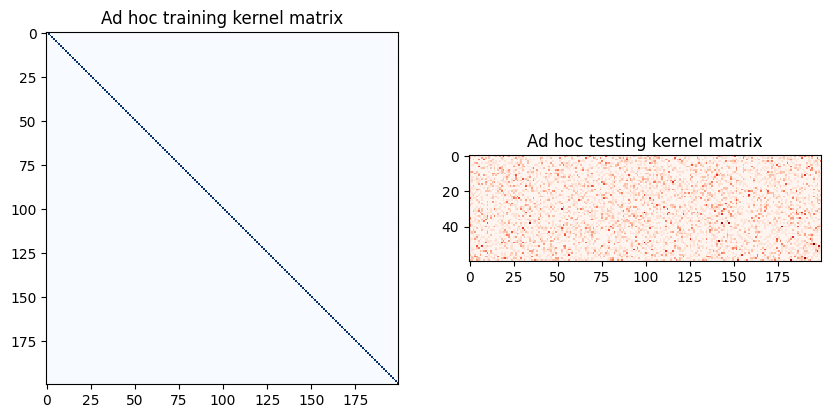

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='precomputed', nu=0.08)  # nu = anomaly proportion
ocsvm.fit(matrix_train)

OneClassSVM(kernel='precomputed', nu=0.08)

In [ ]:
scores = ocsvm.decision_function(matrix_test)
print(scores)

[-0.07791857 -0.07722434 -0.08081917 -0.07995529 -0.0793972  -0.08081516
 -0.08046432 -0.08018616 -0.07888242 -0.08129842 -0.07948484 -0.07894264
 -0.08087368 -0.07924516 -0.0785359  -0.07986055 -0.08049215 -0.07831701
 -0.08284606 -0.0791055  -0.07820193 -0.08000979 -0.08051908 -0.08020149
 -0.07939826 -0.08047986 -0.08248501 -0.08127965 -0.08009347 -0.07878067
 -0.07855807 -0.07989173 -0.07873664 -0.07828026 -0.07978261 -0.08046056
 -0.08071281 -0.08068208 -0.07823257 -0.08247101 -0.07777974 -0.07857518
 -0.08027071 -0.07914916 -0.07979661 -0.0815946  -0.08101313 -0.08132387
 -0.07871161 -0.07894051 -0.0816796  -0.07969294 -0.07940433 -0.07916321
 -0.07975516 -0.07915283 -0.07988402 -0.07963912 -0.07784739 -0.07568163]


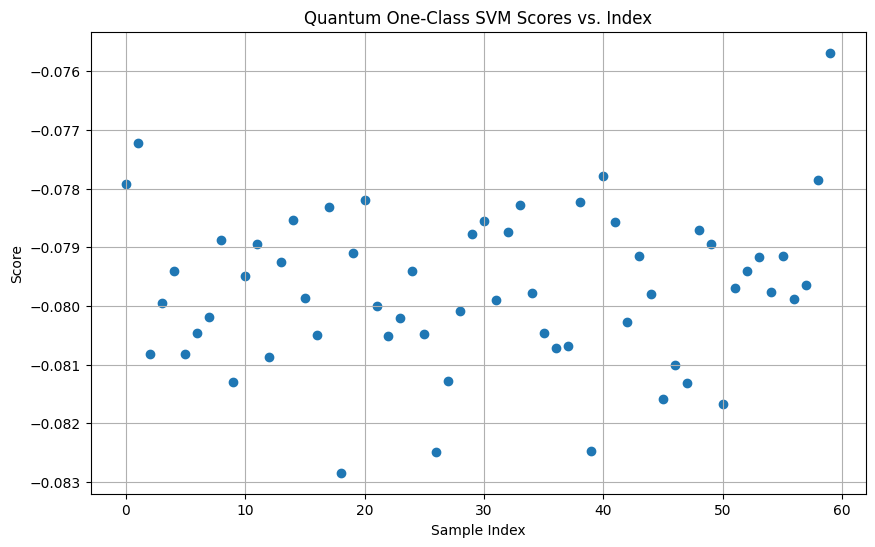

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of scores vs. index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores)
plt.title("Quantum One-Class SVM Scores vs. Index")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:

import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)


0.6060000000000001
